In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
rng = np.random.RandomState(49)
x = rng.rand(100)
y = 3 +5*x + rng.normal(0, 0.5, 100)

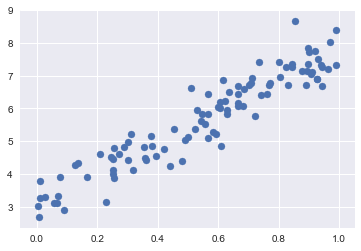

In [3]:
plt.scatter(x, y);

In [4]:
from sklearn.linear_model import LinearRegression

In [19]:
help(sklearn.linear_model.BayesianRidge)

Help on class BayesianRidge in module sklearn.linear_model.bayes:

class BayesianRidge(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
 |  Bayesian ridge regression
 |  
 |  Fit a Bayesian ridge model and optimize the regularization parameters
 |  lambda (precision of the weights) and alpha (precision of the noise).
 |  
 |  Read more in the :ref:`User Guide <bayesian_regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_iter : int, optional
 |      Maximum number of iterations.  Default is 300.
 |  
 |  tol : float, optional
 |      Stop the algorithm if w has converged. Default is 1.e-3.
 |  
 |  alpha_1 : float, optional
 |      Hyper-parameter : shape parameter for the Gamma distribution prior
 |      over the alpha parameter. Default is 1.e-6
 |  
 |  alpha_2 : float, optional
 |      Hyper-parameter : inverse scale parameter (rate parameter) for the
 |      Gamma distribution prior over the alpha parameter.
 |      Default is 1.e-6.
 |  
 |  lambda_1 : float,

In [5]:
model = LinearRegression(fit_intercept = True)

In [6]:
type(model)

sklearn.linear_model.base.LinearRegression

In [8]:
x.shape

(100,)

In [9]:
x = x[:, np.newaxis]
x.shape

(100, 1)

In [10]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'residues_',
 'score',
 'set_params',
 'singular_']

In [12]:
model.coef_

array([ 4.69508003])

In [13]:
model.intercept_

3.1030729939124568

In [17]:
model.score(x, y)

0.8915590208957257

## Test-train splitting

In [20]:
from sklearn.cross_validation import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.6)

In [23]:
x_train.shape

(60, 1)

In [24]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

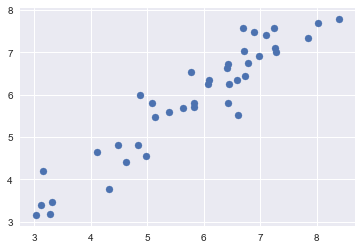

In [25]:
plt.scatter(y_test, y_pred)

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_test, y_pred)

0.22341489653655239

In [28]:
dir(sklearn.metrics)

['SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'base',
 'brier_score_loss',
 'calinski_harabaz_score',
 'classification',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_similarity_score',
 'label_ranking_average_precision_score',
 'label_ranking_loss',
 'log_loss',
 'make_scorer',
 'matthews_corrcoef',
 'mean_absolute_error',
 'mean_squared_error',
 'median_absolute_error',
 'mutual_info_score',
 'normalized_mutual_info_score',
 'pairwise',
 'pairwise_distanc

In [29]:
from sklearn.cross_validation import cross_val_score

In [35]:
scores = cross_val_score(model, x, y, cv = 20, 
                        scoring = 'neg_mean_squared_error')

In [36]:
scores

array([-0.21994235, -0.22291285, -0.37568311, -0.37803358, -0.0765201 ,
       -0.10041183, -0.10330569, -0.5870902 , -0.30296686, -0.16762232,
       -0.14388764, -0.22633065, -0.18130671, -0.26262599, -0.34207204,
       -0.11322857, -0.13980982, -0.06561494, -0.40715571, -0.13466028])

In [37]:
- scores.mean()

0.22755906212561361

# Making a decision tree

In [40]:
def gini_index(group_indx, data, target_name):
    """
    group_indx is a dictionary that has two key-val pairs
    group_indx['left'] and group_indx['right']
    
    group_indx['left'] contains the index values of
    the data (DataFrame) that forms that group
    """
    
    n = len(group_indx['left']) + len(group_indx['right'])
    GI = 0
    for key in group_indx:
        size = len(group_indx[key])
        if size == 0:
            continue
        x = data[target_name].loc[group_indx[key]]
        p = x.value_counts()/len(x)
        score = 1 - np.sum(p**2)
        GI += score * size / n
    return(GI)

In [41]:
def test_split(variable, value, data):
    """
    variable is a string giving the name of the variable
    value is the value at which data will be split
    
    USAGE:
    
    test_split('sepal_length',4, iris)
    """
    out = {'left': data.index[data[variable] < value],
          'right': data.index[data[variable] >= value]}
    return(out)

In [ ]:
def get_split(dat, target_var, min_size):
    """
    Find the optimal split by Gini Index
    """
    out = {}
    if dat.shape[0] < min_size:
        return(out)
    
    gini = 1
    for var in dat.columns:
        if var == target_var:
            continue
        for x in np.sort(dat[var].unique()):
            grp = test_split(var, x, dat)
            g = gini_index(grp, dat, target_var)
            if g > = gini:
                continue
            gini = g
            out['var'] = var
            out['value'] = x
            out['groups'] = grp
            out['gini'] = gini
    return(out)

            

In [51]:
def to_terminal(indx, data, target_var):
    return(data.loc[indx, target_var].value_counts().argmax())

In [ ]:
def split(node, max_depth, min_size, depth, dat, target_var):
    left, right = node['groups']['left'], node['groups']['right']
    if depth > max_depth:
        node['left']= to_terminal(left, dat, target_var)
        node['right']= to_terminal(right, dat, target_var)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left, dat, target_var)
    else:
        node['left'] = get_split(dat.loc[left], target_var, min_size)
        split(node['left'] ,max_depth, min_size, depth+1, dat, target_var)
    if len(right) <= min_size:
        node['right'] = to_terminal(right, dat, target_var)
    else:
        node['right'] = get_split(dat.loc[left], target_var, min_size)
        split(node['right'], max_depth, min_size, depth+1, dat, target_var)

def build_tree(train, max_depth, min_size, target_var):
    root = get_split(train, target_var, min_size)
    split(root, max_depth, min_size, 1, train, target_var)
    return(root)

            

In [50]:
iris['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

In [39]:
x = pd.Series([1,1,1,1,1,2,2,2,3,3,])
x.value_counts()/len(x)

1    0.5
2    0.3
3    0.2
dtype: float64

In [44]:
iris = pd.read_csv('iris.csv')

In [46]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')